In [25]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
file_path = "../Data/Clean_Data_Science_Salaries.csv"
df = pd.read_csv(file_path)




In [27]:
# Data Preprocessing

# Explore the dataset
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Basic statistics of numerical columns
statistics = df.describe()
print("Basic Statistics:\n", statistics)

# Data cleaning and preprocessing
# Convert Salary to USD for uniformity
df['Salary in USD'] = df.apply(lambda row: row['Salary'] if row['Salary Currency'] == 'United States Dollar' else row['Salary']*1.18 if row['Salary Currency'] == 'Euro' else row['Salary']*1.39 if row['Salary Currency'] == 'British Pound Sterling' else row['Salary']*0.011 if row['Salary Currency'] == 'Indian Rupee' else row['Salary'], axis=1)

# Remove unnecessary columns
df.drop(['Title', 'Company', 'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Salary', 'Salary Currency'], axis=1, inplace=True)

# Remove rows with missing values
df.dropna(inplace=True)

# Explore the cleaned dataset
print("Cleaned Dataset:\n", df.head())


Missing Values:
 Job Title             0
Employment Type       0
Experience Level      0
Salary                0
Company Location      0
Employee Residence    0
Company Size          0
Year                  0
dtype: int64
Basic Statistics:
               Salary         Year
count    2442.000000  2442.000000
mean   159925.242834  2022.595004
std     61972.139912     0.613403
min     24000.000000  2020.000000
25%    115455.000000  2022.000000
50%    151000.000000  2023.000000
75%    198200.000000  2023.000000
max    450000.000000  2023.000000


KeyError: 'Salary Currency'

In [ ]:
# Exploratory Data Analysis (EDA)
# ... (additional EDA based on project-specific insights)

# Machine Learning
# Select features and target variable
features = df[['Job Title', 'Experience Level', 'Company Location']]
target = df['Salary in USD']

# Encode categorical variables
label_encoder = LabelEncoder()
for column in features.columns:
    features.loc[:, column] = label_encoder.fit_transform(features[column])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a machine learning model (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error for ML Model: {mse}')

#ML model evaluation vs. simple baseline model

# Calculate the mean salary
mean_salary = df['Salary in USD'].mean()

# Create an array of mean salary predictions with the same length as the test set
mean_salary_predictions = [mean_salary] * len(y_test)

# Calculate the mean squared error for the mean salary predictions
mean_salary_mse = mean_squared_error(y_test, mean_salary_predictions)

# Print the mean squared error for the mean salary predictions
print(f'Mean Squared Error for Mean Salary Predictions: {mean_salary_mse}')

mse_difference = mse - mean_salary_mse
print(f'Mean Squared Error Difference: {mse_difference}')

model.score(X_test, y_test)

Mean Squared Error for ML Model: 68244083885.04575
Mean Squared Error for Mean Salary Predictions: 67771017893.20575
Mean Squared Error Difference: 473065991.84000397


-0.010350914801583011

Mean Squared Error (Decision Tree): 62814373127.470924


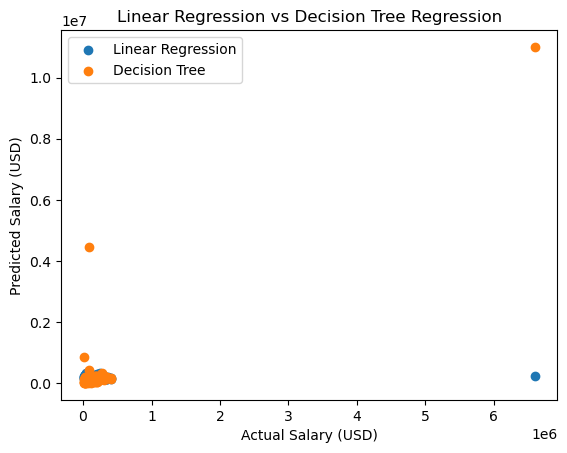

In [ ]:
# Visualization
# ... (visualize predicted vs actual salaries using Matplotlib or Plotly)
# Machine Learning (Decision Tree Regressor)
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Make predictions using Decision Tree Regressor
predictions_dt = model_dt.predict(X_test)

# Evaluate the Decision Tree model
mse_dt = mean_squared_error(y_test, predictions_dt)
print(f'Mean Squared Error (Decision Tree): {mse_dt}')

# Visualization (Predicted vs Actual)
plt.scatter(y_test, predictions, label='Linear Regression')
plt.scatter(y_test, predictions_dt, label='Decision Tree')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title('Linear Regression vs Decision Tree Regression')
plt.legend()
plt.show()
# Provide insights and recommendations to fresh data science students based on the analysis


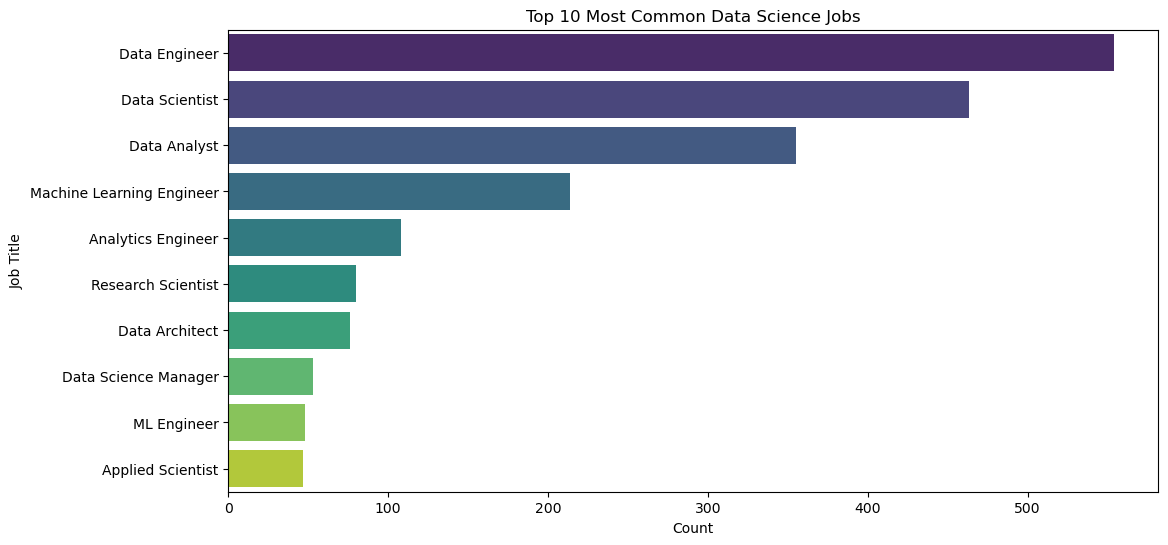

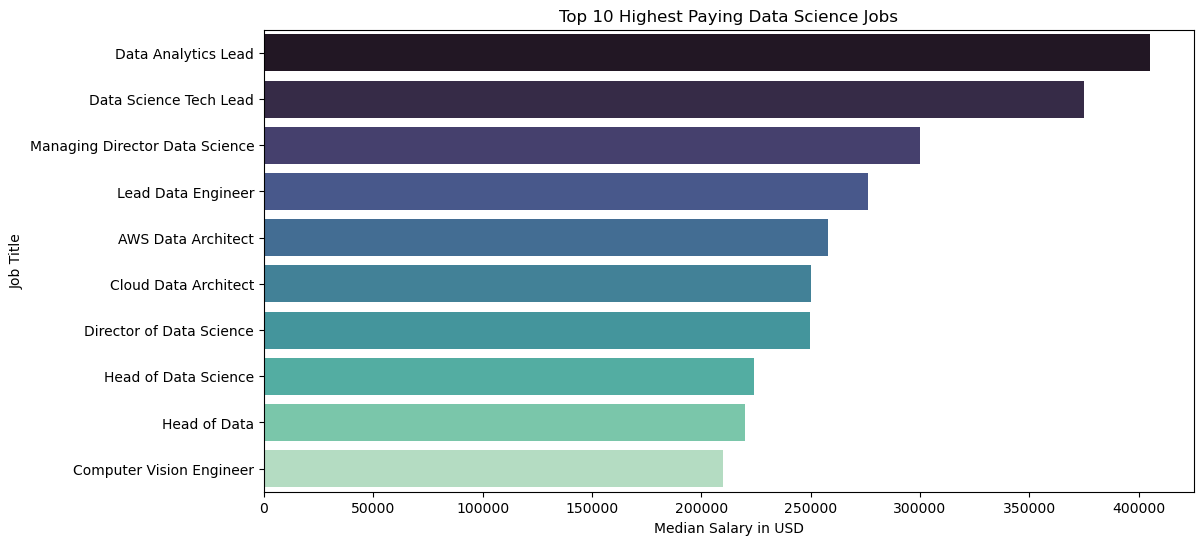

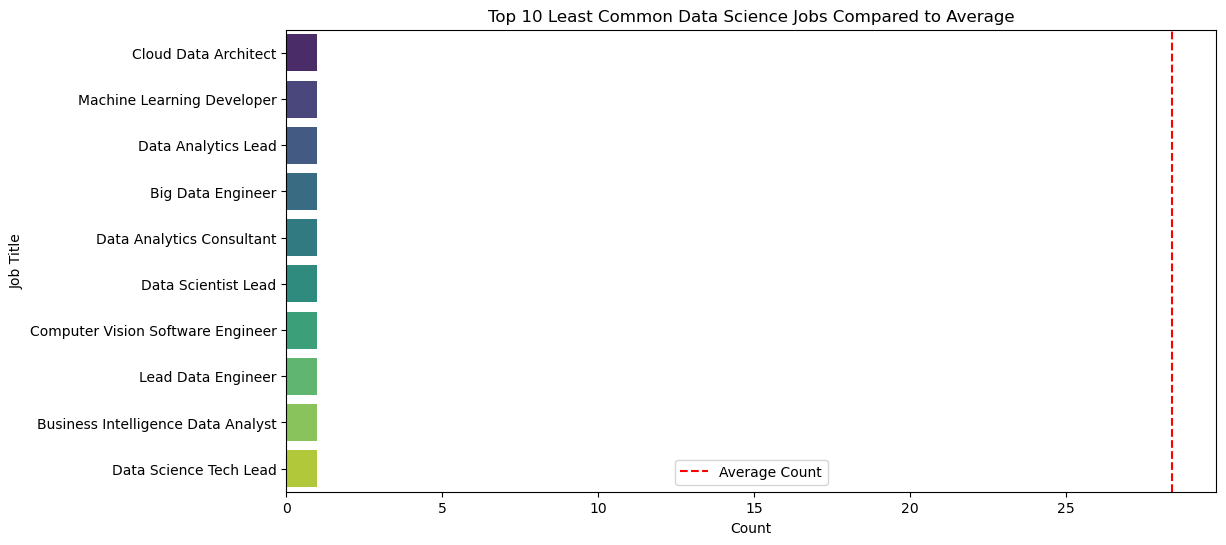

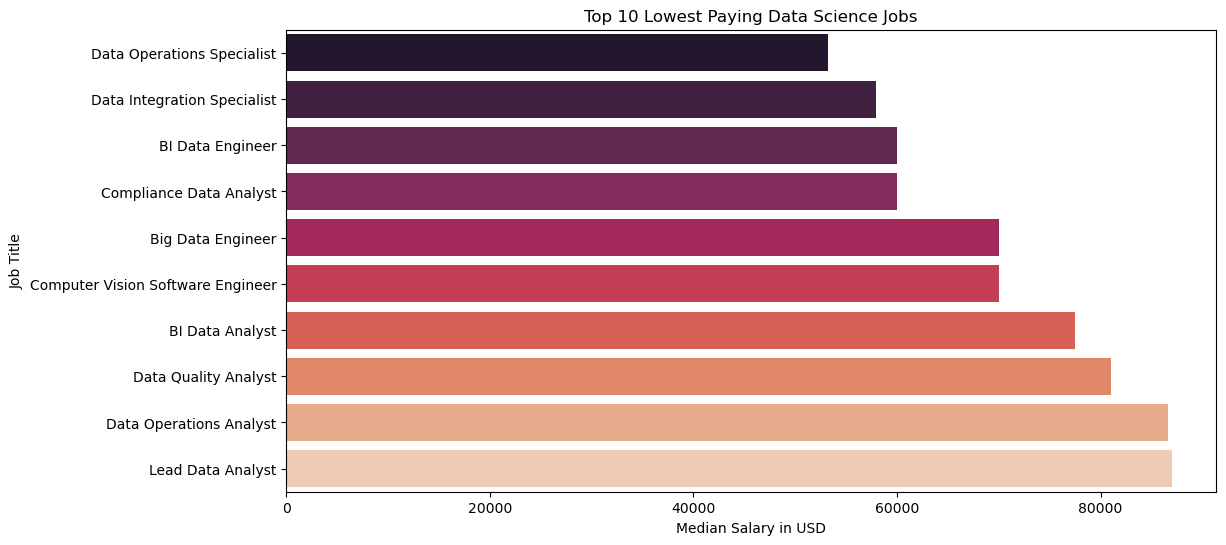

In [30]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
cleaned_file_path = "../Data/Clean_Data_Science_Salaries.csv"
df = pd.read_csv(cleaned_file_path)

# Visualizations

## What are the 10 most common jobs?
plt.figure(figsize=(12, 6))
common_jobs = df['Job Title'].value_counts().nlargest(10)
sns.barplot(x=common_jobs.values, y=common_jobs.index, palette='viridis')
plt.title('Top 10 Most Common Data Science Jobs')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()

## What are the 10 highest paying jobs?
plt.figure(figsize=(12, 6))
highest_paying_jobs = df.groupby('Job Title')['Salary'].median().nlargest(10)
sns.barplot(x=highest_paying_jobs.values, y=highest_paying_jobs.index, palette='mako')
plt.title('Top 10 Highest Paying Data Science Jobs')
plt.xlabel('Median Salary in USD')
plt.ylabel('Job Title')
plt.show()

## What are the 10 least common jobs compared to the average?
plt.figure(figsize=(12, 6))
job_counts = df['Job Title'].value_counts()
average_count = job_counts.mean()
least_common_jobs = job_counts[job_counts < average_count].nsmallest(10)
sns.barplot(x=least_common_jobs.values, y=least_common_jobs.index, palette='viridis')
plt.axvline(x=average_count, color='red', linestyle='--', label='Average Count')
plt.title('Top 10 Least Common Data Science Jobs Compared to Average')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.legend()
plt.show()

## What are the 10 lowest paying jobs?
plt.figure(figsize=(12, 6))
lowest_paying_jobs = df.groupby('Job Title')['Salary'].median().nsmallest(10)
sns.barplot(x=lowest_paying_jobs.values, y=lowest_paying_jobs.index, palette='rocket')
plt.title('Top 10 Lowest Paying Data Science Jobs')
plt.xlabel('Median Salary in USD')
plt.ylabel('Job Title')
plt.show()
